In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

# Gantilah path ini sesuai dengan struktur direktori di Colab
colab_directory = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train'

for dirname, _, filenames in os.walk(colab_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-010.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-015.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-005.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-016.png
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-001.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-012.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-009.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-017.png
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-006.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-014.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-008.jpg
/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus/humus-013.jpg
/con

# import plugin

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
import itertools
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

# Deklarasi path gambar

In [5]:
X = []
Z = []
IMG_SIZE = 150

aluvial = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/01-Aluvial'
andosol = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/02-Andosol'
entisol = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/03-Entisol'
humus = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/04-Humus'
inceptisol = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/05-Inceptisol'
laterit = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/06-Laterit'
kapur = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/07-Kapur'
pasir = '/content/drive/MyDrive/Bangkit Batch 2/capstone/tanah/train/08-Pasir'

# Buat variabel

In [6]:
def assign_label(img,Jenis_tanah):
    return Jenis_tanah

# Menyatukan data menjadi path atau satuan dan memberikan label

In [7]:
def make_train_data(Jenis_tanah,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,Jenis_tanah)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

# Membuat train data path dan penamaan

In [8]:
make_train_data('Aluvial', aluvial)
print(len(X))

make_train_data('Andosol', andosol)
print(len(X))

make_train_data('Entisol', entisol)
print(len(X))

make_train_data('Humus',humus)
print(len(X))

make_train_data('Inceptisol', inceptisol)
print(len(X))

make_train_data('Laterit', laterit)
print(len(X))

make_train_data('Kapur', kapur)
print(len(X))

make_train_data('Pasir', pasir)
print(len(X))

100%|██████████| 90/90 [00:31<00:00,  2.86it/s]


90


100%|██████████| 90/90 [00:30<00:00,  2.98it/s]


180


100%|██████████| 90/90 [00:25<00:00,  3.56it/s]


270


100%|██████████| 90/90 [00:26<00:00,  3.42it/s]


360


100%|██████████| 90/90 [00:28<00:00,  3.11it/s]


450


100%|██████████| 90/90 [00:27<00:00,  3.31it/s]


540


100%|██████████| 90/90 [00:24<00:00,  3.71it/s]


630


100%|██████████| 90/90 [00:31<00:00,  2.84it/s]

720


# Menampilkan patch dan label yang sudah dibuat beserta nama tanah

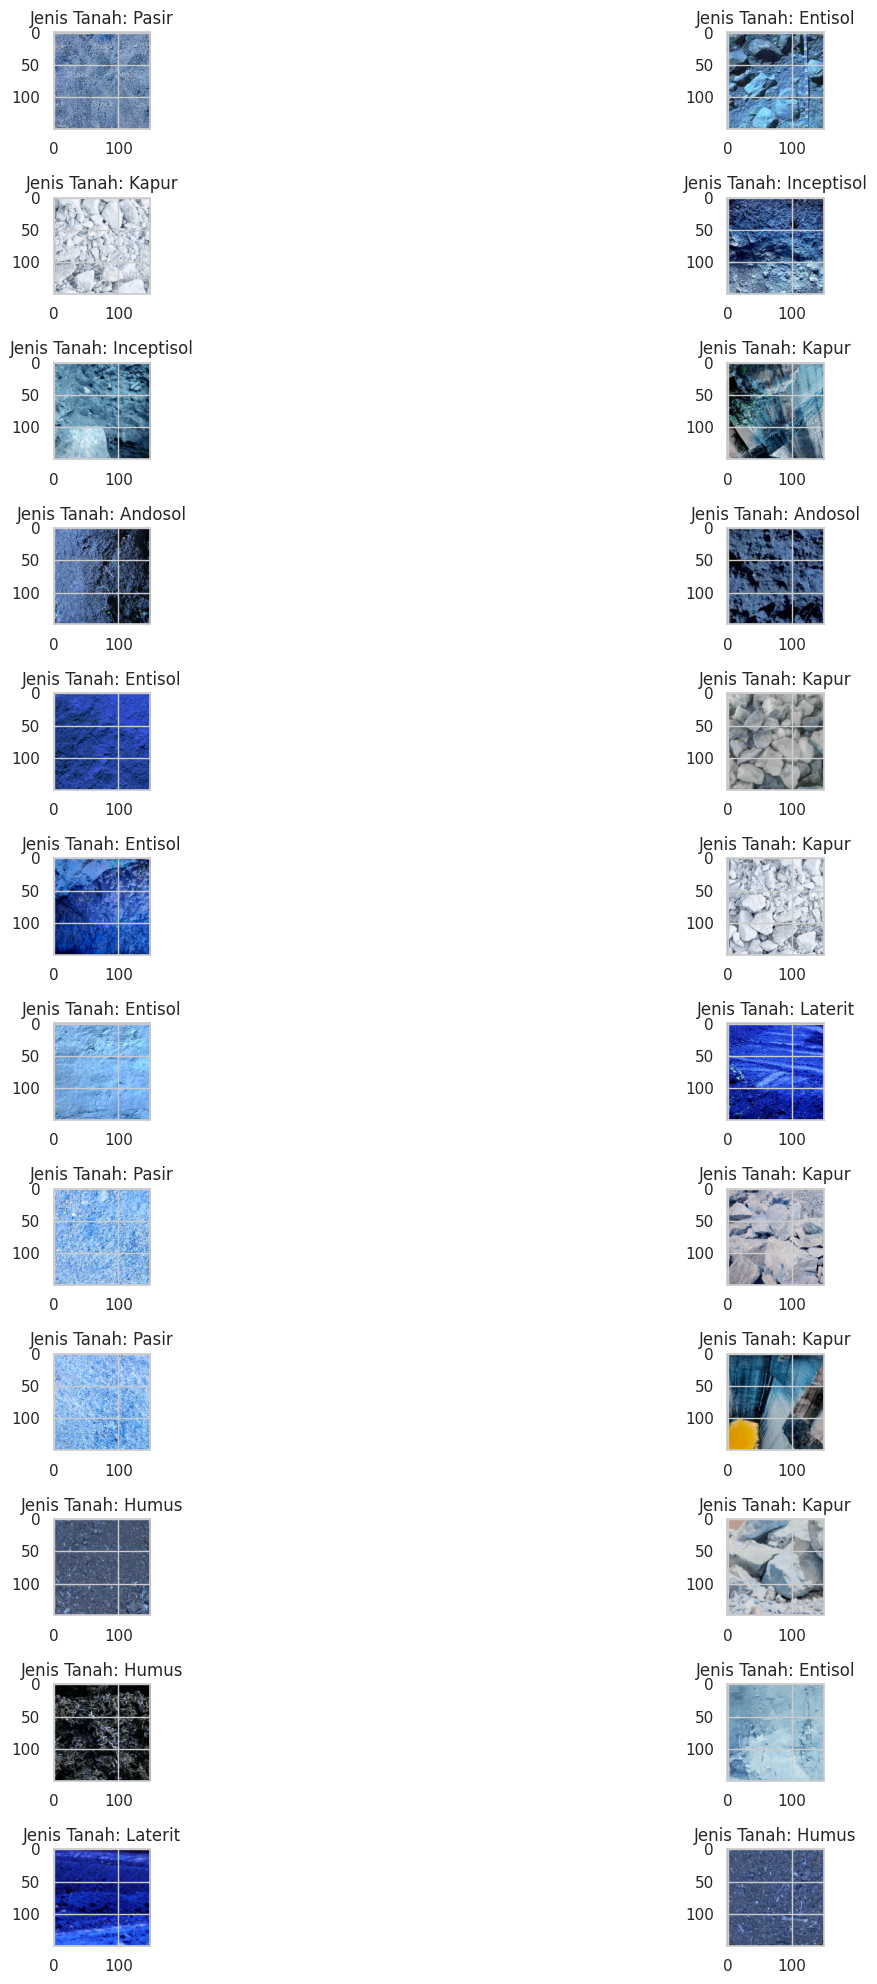

In [9]:
fig,ax=plt.subplots(12,2)
fig.set_size_inches(20,20)
for i in range(12):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Jenis Tanah: '+Z[l])

plt.tight_layout()

# Membuat pangilan singkat untuk variable

In [10]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,8)
X = np.array(X)
X = X/255

# Membuat nama dari isi tabel yang digunakan untuk test dan train

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

# Mengambil data secara acak yang digunakan pada train dan test data

In [12]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Membuat model data CNN untuk sequential tabel atau summary data

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (17,17),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(8, activation = "softmax"))

# Membuat val akurasi pada saat epoch data

In [14]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# Membuat Datagen

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

# Memberikan keterangan loss akurasi dan metric akurasi

In [16]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# Memuat model ke model.fit_generator

In [17]:
batch = 17
epoch = 50
step = np.ceil(x_train.shape[0] / batch)

History = model.fit_generator(
    datagen.flow(x_train,y_train, batch_size = batch),
    epochs = epoch,
    validation_data = (x_test,y_test),
    verbose = 1,
    steps_per_epoch = step
)

Epoch 1/50
34/34 [==============================] - 147s 4s/step - loss: 2.0360 - accuracy: 0.1684 - val_loss: 1.7788 - val_accuracy: 0.2708
Epoch 2/50
34/34 [==============================] - 137s 4s/step - loss: 1.7867 - accuracy: 0.3056 - val_loss: 1.5619 - val_accuracy: 0.4167
Epoch 3/50
34/34 [==============================] - 137s 4s/step - loss: 1.5572 - accuracy: 0.3941 - val_loss: 1.4568 - val_accuracy: 0.4722
Epoch 4/50
34/34 [==============================] - 136s 4s/step - loss: 1.4577 - accuracy: 0.4340 - val_loss: 1.4114 - val_accuracy: 0.4583
Epoch 5/50
34/34 [==============================] - 137s 4s/step - loss: 1.3084 - accuracy: 0.5069 - val_loss: 1.4004 - val_accuracy: 0.4722
Epoch 6/50
34/34 [==============================] - 134s 4s/step - loss: 1.3419 - accuracy: 0.5087 - val_loss: 1.4049 - val_accuracy: 0.4306
Epoch 7/50
34/34 [==============================] - 134s 4s/step - loss: 1.3181 - accuracy: 0.4965 - val_loss: 1.3603 - val_accuracy: 0.5069
Epoch 8/50
34

# Menyimpan hasil model ke format .h5

In [18]:
model.save('/content/drive/MyDrive/Bangkit Batch 2/capstone/model_tanah.h5')

# Konversi model h5 ke TFlite

In [19]:
saved_model_dir = '/content/drive/MyDrive/Bangkit Batch 2/capstone'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

target_names = ['Aluvial','Andosol','Entisol','Humus','Inceptisol','Laterit','Kapur','Pasir']
labels = '\n'.join(target_names)

with open('labels.txt', 'w') as f:
  f.write(labels)

# Menampilkan squential tabel

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      27776     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

# Membuat variabel alias untuk model format .h5

In [21]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit Batch 2/capstone/model_tanah.h5')

# Menampilkan squential tabel

In [22]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      27776     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

# Menampilkan confusion metrix

In [23]:
Y_pred = model.predict_generator(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  1  0  3  3  0  0]
 [ 0 11  2  0  1  1  0  0]
 [ 0  2 15  0  2  1  0  1]
 [ 0  1  0 16  0  0  0  0]
 [ 0  0  3  0 13  1  0  2]
 [ 3  0  2  0  0 12  0  0]
 [ 0  1  1  0  0  0 16  1]
 [ 1  0  0  1  3  1  0 13]]


# Menampilkan Classification Report

In [24]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Aluvial       0.71      0.59      0.65        17
     Andosol       0.73      0.73      0.73        15
     Entisol       0.62      0.71      0.67        21
       Humus       0.94      0.94      0.94        17
  Inceptisol       0.59      0.68      0.63        19
     Laterit       0.63      0.71      0.67        17
       Kapur       1.00      0.84      0.91        19
       Pasir       0.76      0.68      0.72        19

    accuracy                           0.74       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.75      0.74      0.74       144



# Menampilkan Normalized Confusion matrix dalam bentuk tabel

In [25]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


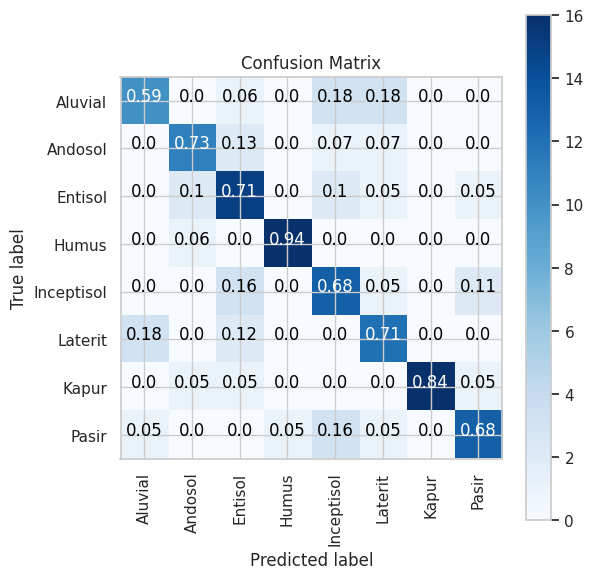

In [26]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# Membuat variabel alias untuk model format .h5

In [28]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkit Batch 2/capstone/model_tanah.h5')

# Menampilkan tabel grafik Loss

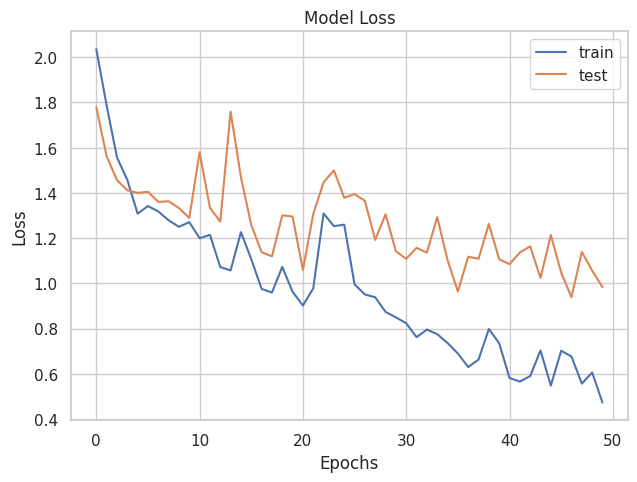

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Menampilkan tabel grafik Accuracy

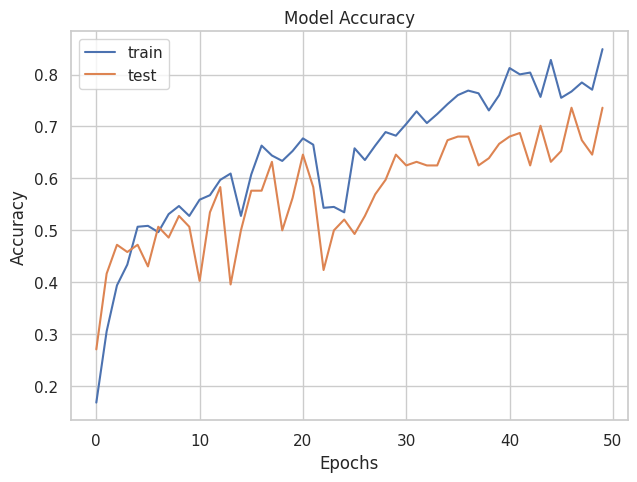

In [30]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Membuat variabel untuk memulai prediksi

In [31]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

5/5 [==============================] - 8s 2s/step


# Menyimpan beberapa indeks yang salah diklasifikasikan

In [32]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# Memanggil dan mengetest gambar

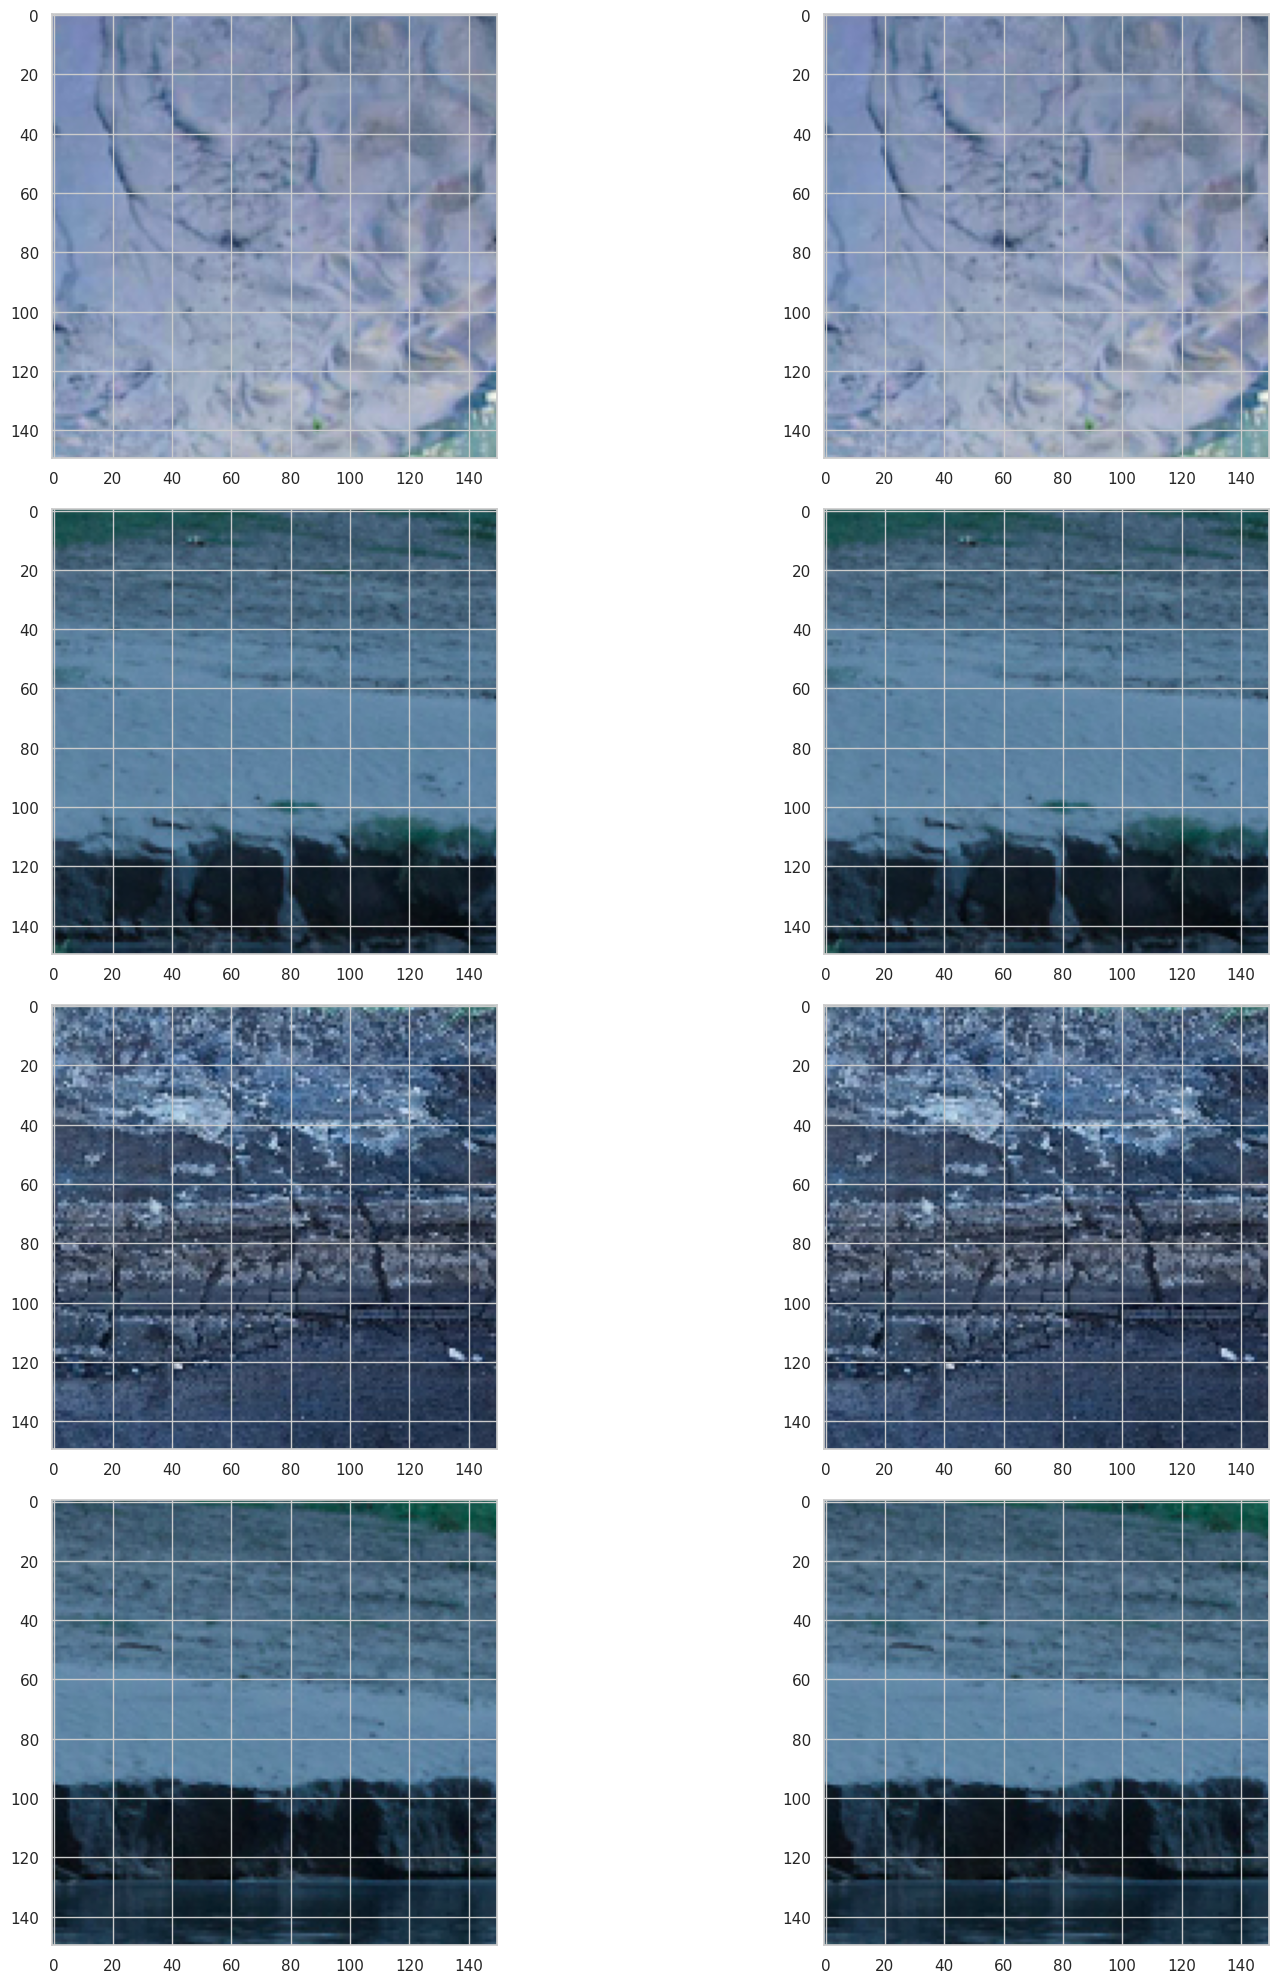

In [33]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        #ax[i,j].set_title("Predicted Disease : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
    plt.tight_layout()
    count+=1

In [34]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        plt.tight_layout()
        count+=1

Output hidden; open in https://colab.research.google.com to view.

In [35]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Jenis tanah : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1

Output hidden; open in https://colab.research.google.com to view.

# Memberikan akurasi dan loss ke data model alias

In [36]:
# new_model.fit(x_train,y_train,epochs=epoch,batch_size=batch,validation_data = (x_test,y_test))

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.8316

ValueError: ignored